In [15]:
suppressPackageStartupMessages({
  library(scater)
  library(scran)
  library(patchwork)
})
rm(list = ls())
######################
# Smartseq2 CD45 All
######################
sce <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_analysed.rds")
sce_endo <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_endothelial.rds")
sce_epi <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_epithelial.rds")
sce_mes <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_mesenchyme.rds")
sce_TNK <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_T_NK.rds")
sce_myeloid <- readRDS("../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_Myeloid.rds")

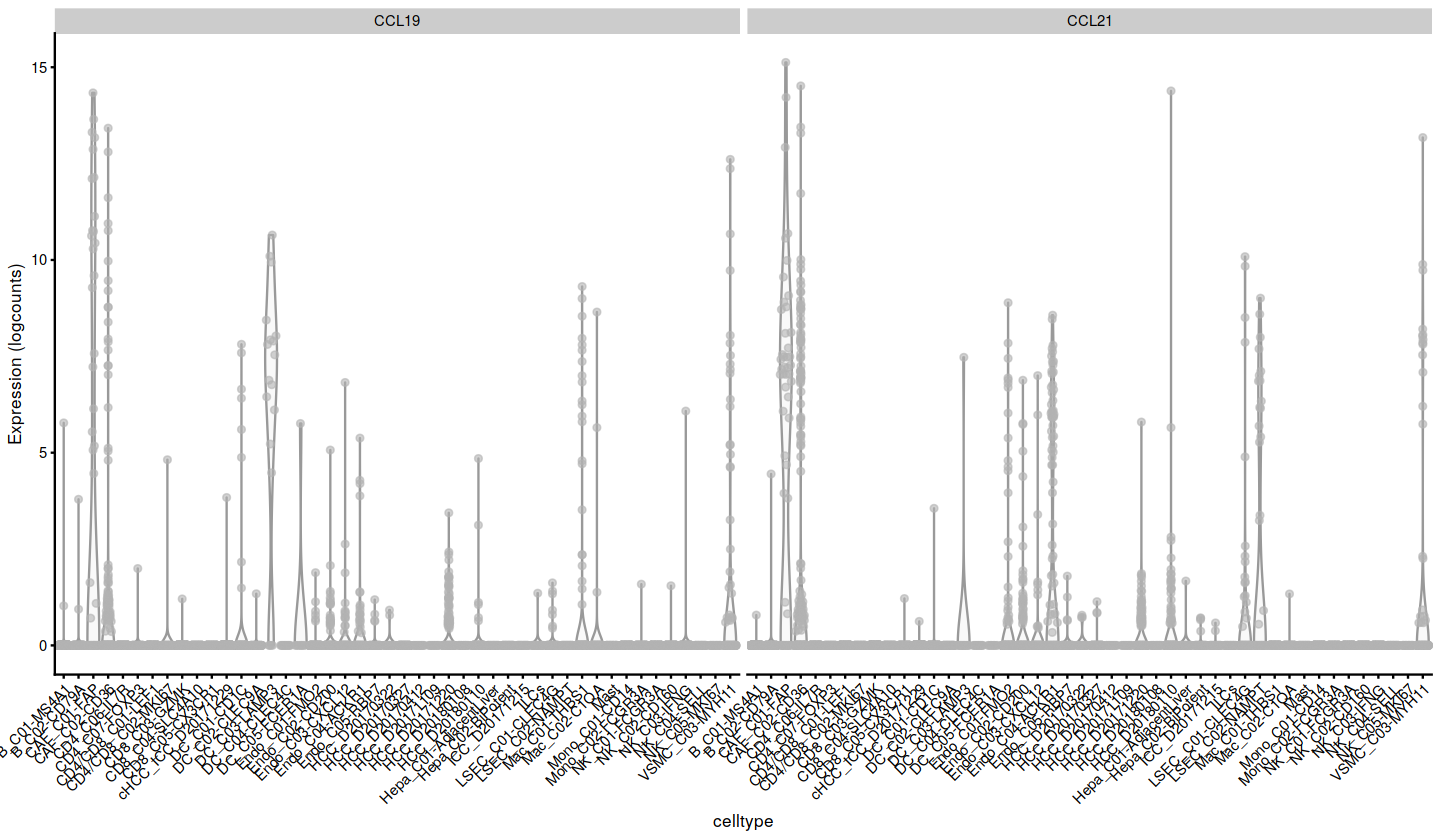

In [26]:
plotExpression(sce, x = 'celltype', features = c('CCL19', 'CCL21')) + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

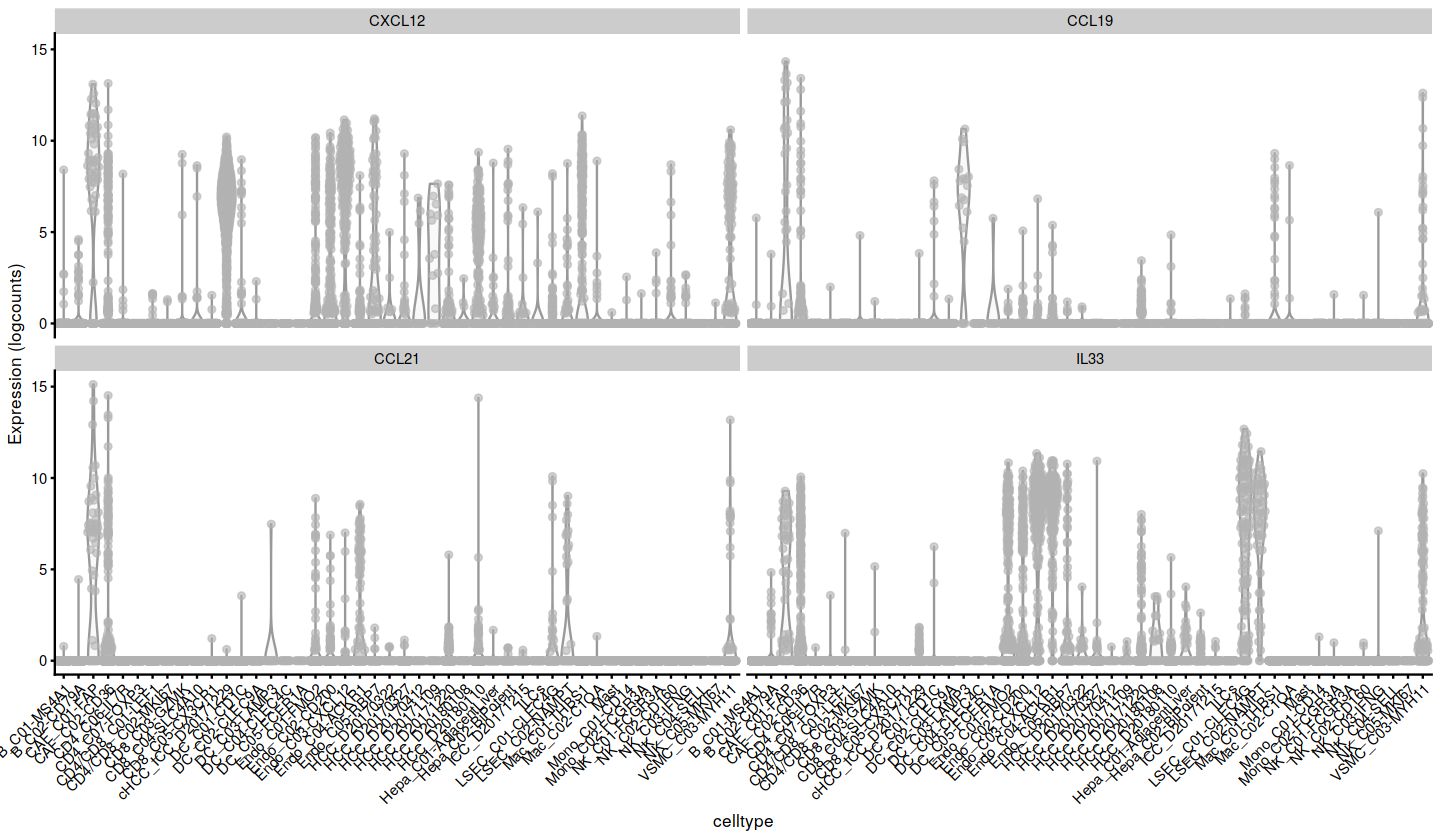

In [21]:
plotExpression(sce, x = 'celltype', features = c('CXCL12', 'CCL19', 'CCL21', 'IL33')) + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

In [23]:
table(sce_mes$donor, sce_mes$leiden_anno)

           
            CAF_C02-CD36 VSMC_C03-MYH11 CAF_C01-FAP
  D20170322           31             11           9
  D20170327           25              9           1
  D20171109           48              6           6
  D20171215           19             20           1
  D20171220          146             56          30
  D20171229            2              2           2
  D20180108          117             33           2
  D20180110           47             20           7

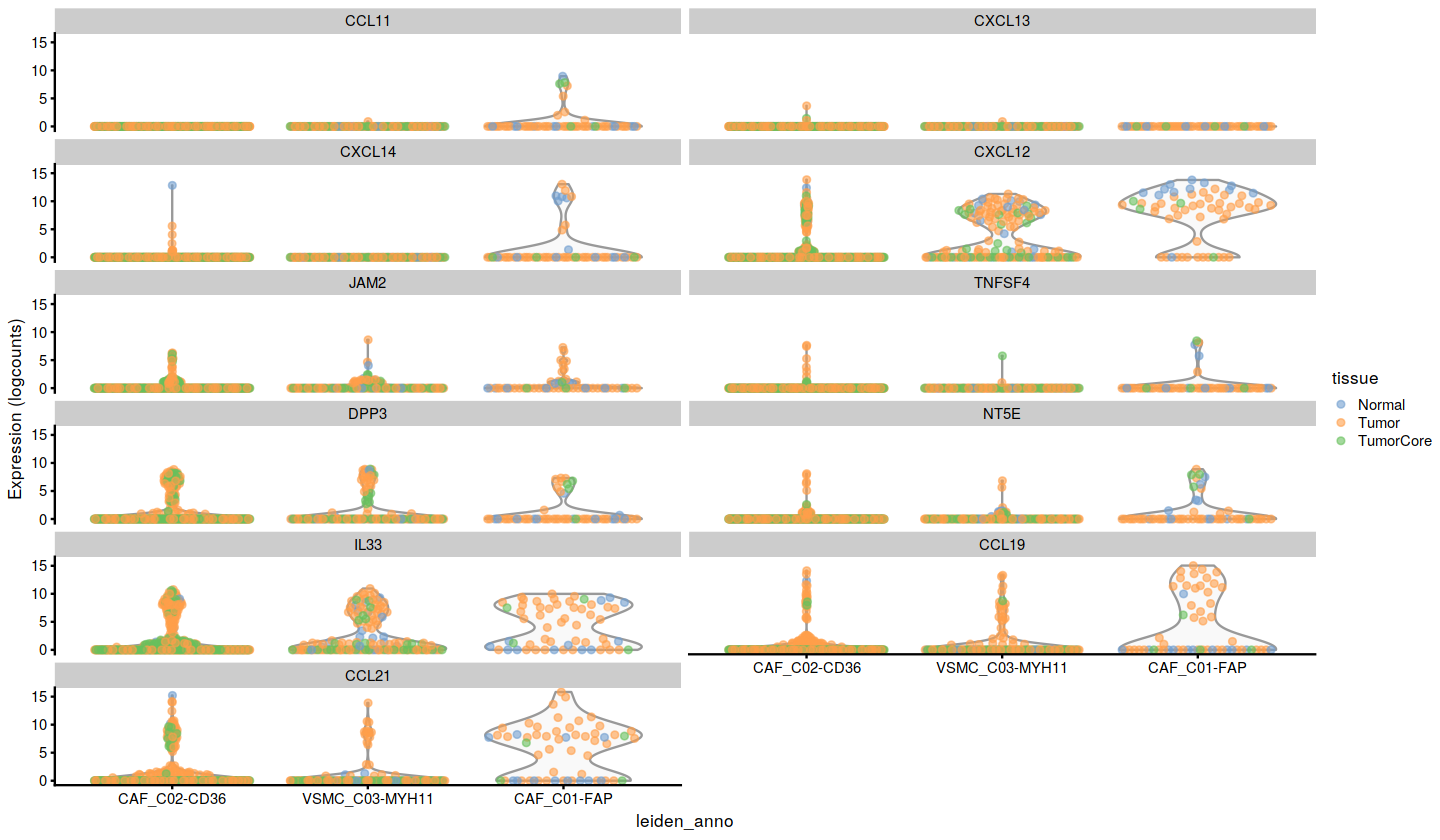

In [24]:
plotExpression(sce_mes, x = 'leiden_anno', colour_by = 'tissue', features = c('CCL11', 'CXCL13', 'CXCL14','CXCL12', 'JAM2', 'TNFSF4', 'DPP3', 'NT5E', 'IL33', 'CCL19', 'CCL21'))

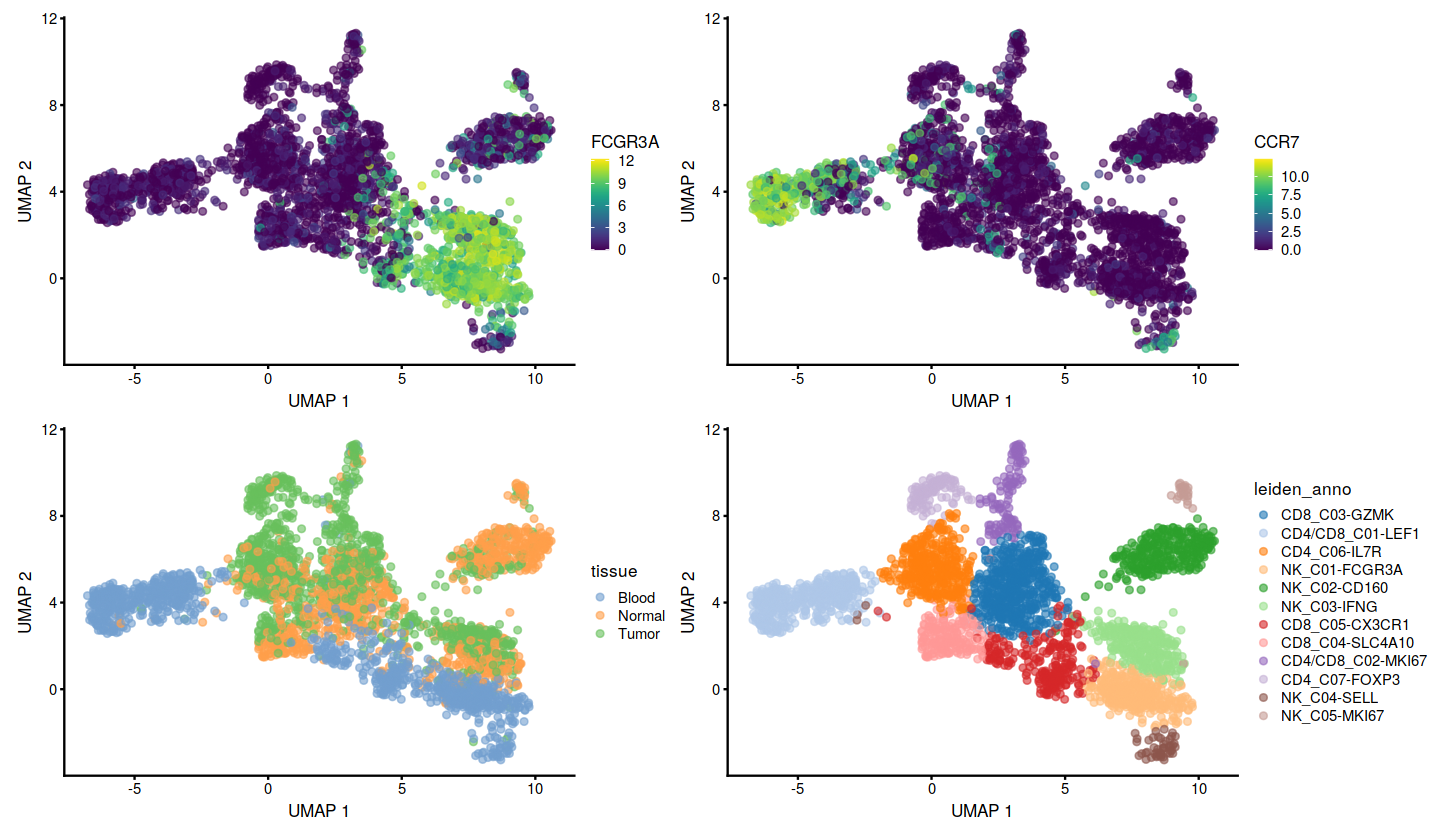

In [6]:
options(repr.plot.width = 12)
p1 <- plotUMAP(sce_TNK, colour_by = "FCGR3A")
p2 <- plotUMAP(sce_TNK, colour_by = "CCR7")
p3 <- plotUMAP(sce_TNK, colour_by = "tissue")
p4 <- plotUMAP(sce_TNK, colour_by = "leiden_anno")

p1 + p2 + p3 + p4

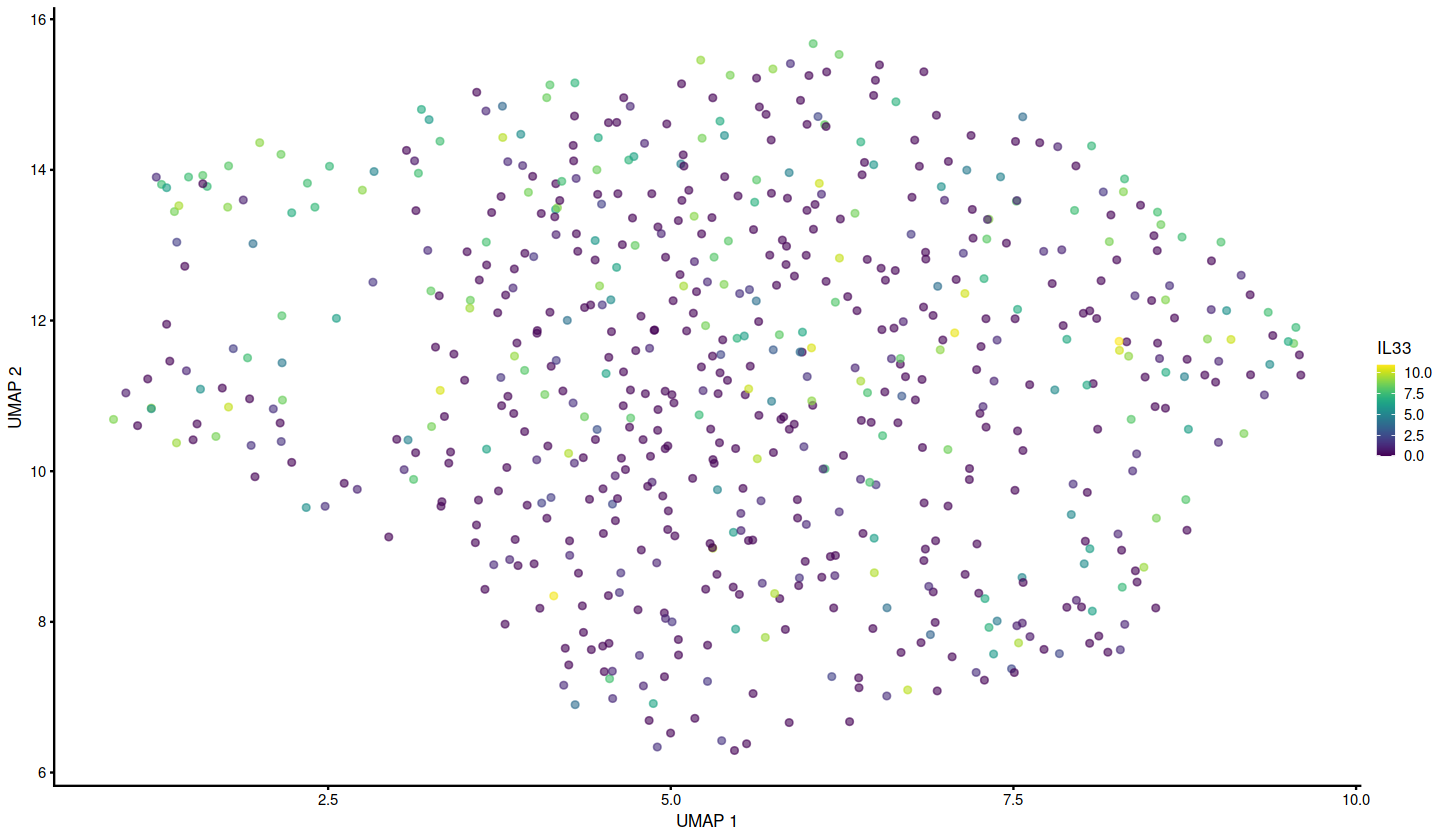

In [20]:
plotUMAP(sce_mes, colour_by = "IL33")

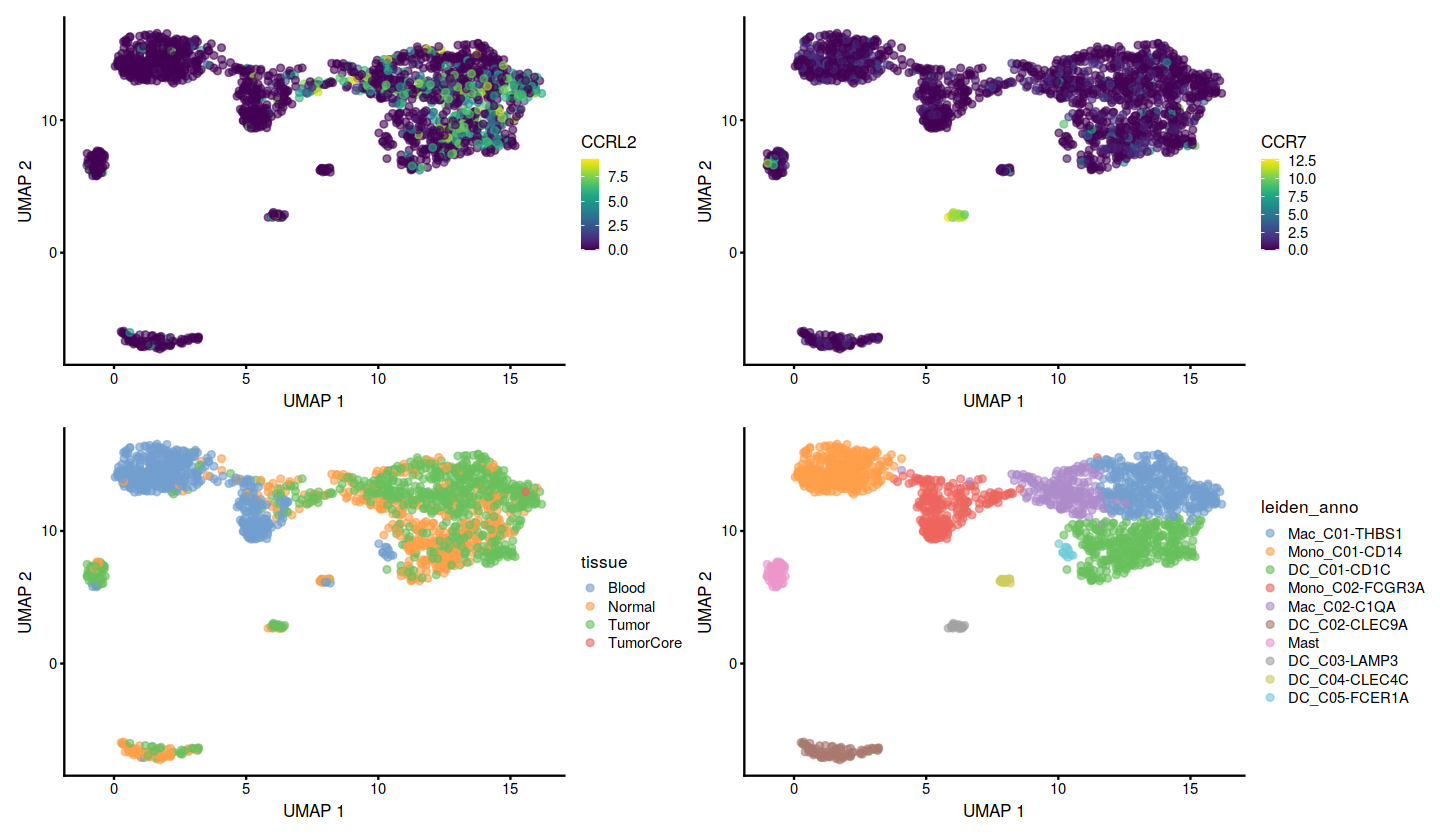

In [10]:
options(repr.plot.width = 12)
p1 <- plotUMAP(sce_myeloid, colour_by = "CCRL2")
p2 <- plotUMAP(sce_myeloid, colour_by = "CCR7")
p3 <- plotUMAP(sce_myeloid, colour_by = "tissue")
p4 <- plotUMAP(sce_myeloid, colour_by = "leiden_anno")

p1 + p2 + p3 + p4

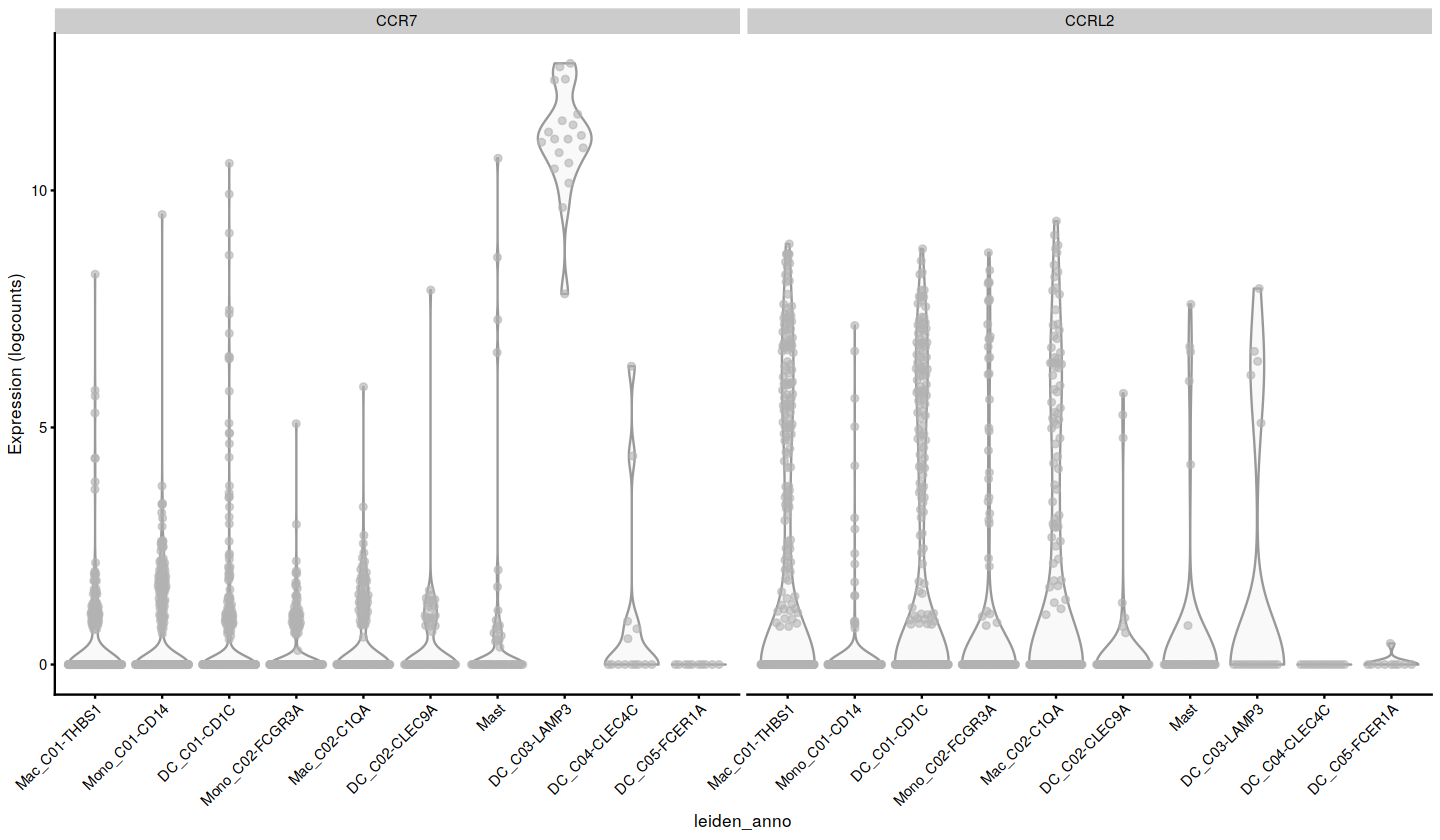

In [11]:
plotExpression(sce_myeloid, x = 'leiden_anno', features = c("CCR7", "CCRL2")) + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

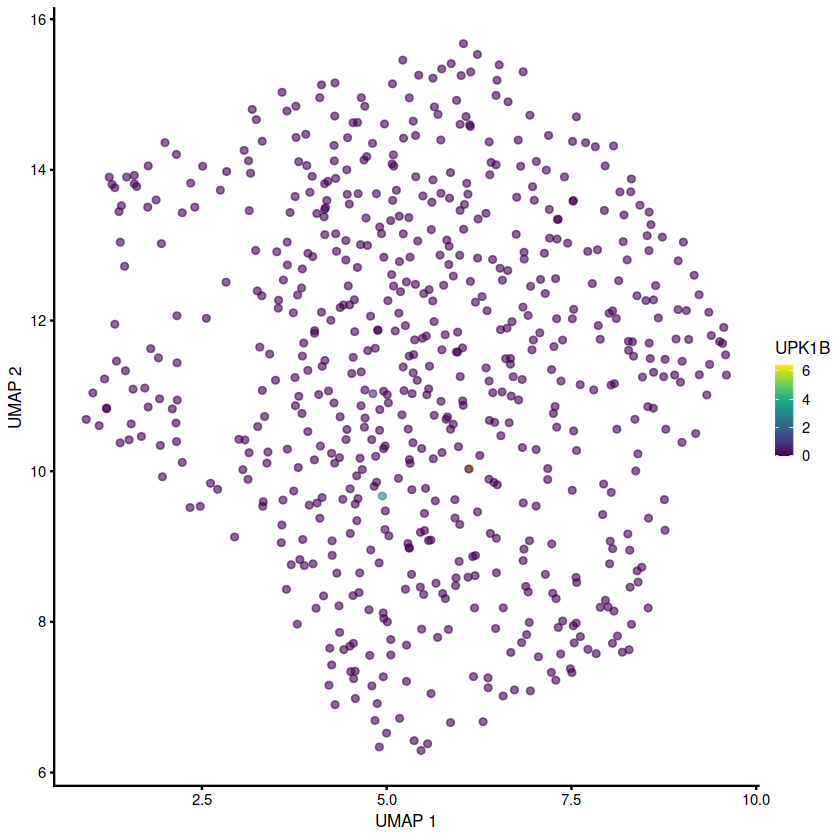

In [3]:
plotUMAP(sce_mes, colour_by = "UPK1B")

In [27]:
table(sce_endo$leiden_anno)


  Endo_C01-FMO2  Endo_C02-CD200 Endo_C03-CXCL12  Endo_C04-ACKR1 LSEC_C01-CLEC4G 
            315             268             188             149             124 
  Endo_C05-RBP7  LSEC_C02-NAMPT 
             90              55 

In [28]:
# Some mislabeled CD45P cell
colData(sce)[colnames(sce_endo), "celltype"] <- as.character(sce_endo$leiden_anno)
colData(sce)[colnames(sce_epi), "celltype"] <- as.character(sce_epi$leiden_anno)
colData(sce)[colnames(sce_TNK), "celltype"] <- as.character(sce_TNK$leiden_anno)
colData(sce)[colnames(sce_mes), "celltype"] <- as.character(sce_mes$leiden_anno)
colData(sce)[colnames(sce_myeloid), "celltype"] <- as.character(sce_myeloid$leiden_anno)


In [32]:
colData(sce)[is.na(sce$celltype), "celltype"] <- colData(sce)[is.na(sce$celltype), "leiden_global_celltype"]

In [34]:
colData(sce)[which(sce$celltype == "B Cell"), "celltype"] <- "B_C01-MS4A1"
colData(sce)[which(sce$celltype == "Plasma B Cell"), "celltype"] <- "B_C02-CD79A"

In [42]:
colData(sce)[which(sce$celltype == "Hepatocytes"), "celltype"] <- "Hepatocytes_AdjacentLiver"
colData(sce)[which(sce$celltype == "Liver bi-potent cells"), "celltype"] <- "Liver_bipotent"


# Add UMAP coordinate

In [36]:
mt_umap <- setNames(data.frame(reducedDim(sce_mes, "UMAP")), nm = c("UMAP1.MES", "UMAP2.MES"))
colData(sce)[rownames(mt_umap), "UMAP1.MES"] <- mt_umap[[1]]
colData(sce)[rownames(mt_umap), "UMAP2.MES"] <- mt_umap[[2]]

In [37]:
mt_umap <- setNames(data.frame(reducedDim(sce_epi, "UMAP")), nm = c("UMAP1.EPI", "UMAP2.EPI"))
colData(sce)[rownames(mt_umap), "UMAP1.EPI"] <- mt_umap[[1]]
colData(sce)[rownames(mt_umap), "UMAP2.EPI"] <- mt_umap[[2]]

In [38]:
mt_umap <- setNames(data.frame(reducedDim(sce_myeloid, "UMAP")), nm = c("UMAP1.MYE", "UMAP2.MYE"))
colData(sce)[rownames(mt_umap), "UMAP1.MYE"] <- mt_umap[[1]]
colData(sce)[rownames(mt_umap), "UMAP2.MYE"] <- mt_umap[[2]]

In [39]:
mt_umap <- setNames(data.frame(reducedDim(sce_TNK, "UMAP")), nm = c("UMAP1.TNK", "UMAP2.TNK"))
colData(sce)[rownames(mt_umap), "UMAP1.TNK"] <- mt_umap[[1]]
colData(sce)[rownames(mt_umap), "UMAP2.TNK"] <- mt_umap[[2]]

In [40]:
mt_umap <- setNames(data.frame(reducedDim(sce_endo, "UMAP")), nm = c("UMAP1.ENDO", "UMAP2.ENDO"))
colData(sce)[rownames(mt_umap), "UMAP1.ENDO"] <- mt_umap[[1]]
colData(sce)[rownames(mt_umap), "UMAP2.ENDO"] <- mt_umap[[2]]

In [43]:
saveRDS(sce, file = "../../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_analysed.rds")